<a href="https://colab.research.google.com/github/Tiamiyu1/AI-OAU-Computer-Vision-Learning-Track-Team-Pluto-/blob/main/Assignment/MNIST_Digit_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')

In [2]:
# !git clone https://github.com/tensorflow/tensorflow.git

In [3]:
import warnings
warnings.filterwarnings('ignore')
import tensorflow as tf

In [4]:
# Getting the data and separatng into into test, train sets with their labels
(x_train, y_train),(x_test, y_test) = tf.keras.datasets.mnist.load_data()
# x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


In [5]:
num_classes = 10 #We are going to be classifying 10 digits
img_rows, img_cols = 28, 28 #No of Pixels on height = 28 and width = 28 

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_test.shape

(10000, 28, 28)

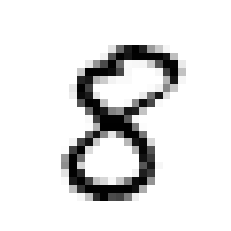

In [11]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
img_idx = np.random.randint(0, x_test.shape[0])

# visualize one random sample in black and white
plt.imshow(x_test[img_idx], cmap='Greys')
plt.axis("off")
plt.show()

In [14]:
x_train.shape

(60000, 28, 28)

In [15]:
# Normalizing the RGB codes by diving it by the max RGB value
x_train, x_test = x_train / 255., x_test / 255.
print("Normalized pixel values between {} and {}".format(x_train.min(), x_train.max()))

Normalized pixel values between 0.0 and 1.0


In [ ]:
# How quickly the cost function is adjusted
learning_rate = 0.001


In [ ]:
# we have 10 classes from 0 through 9
n_classes = 10
# 50,000 training examples
n_sample= x_train.shape[0]

In [ ]:

# we should have flat input i.e 28 * 28
n_input = 784

In [ ]:
# 256 neurons for each of the two hidden layers
n_hidden_1 = 256
n_hidden_2 = 256

In [28]:
input_shape = (28, 28)
# No of ouput classes 0-9
n_classes = 10
# No of training cycle to go through
training_epochs =  15
# No of sample to feed into the system at once
batch_size = 100

In [26]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = input_shape), #Convert Image(28,28) to input of size 28*28=784
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(n_classes, activation='softmax')
])

In [30]:
model.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.fit(x_train, y_train, epochs=35, verbose=1, validation_data=(x_test, y_test),batch_size=32)

Epoch 1/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1380 - accuracy: 0.9622 - val_loss: 0.1401 - val_accuracy: 0.9598
Epoch 2/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1316 - accuracy: 0.9642 - val_loss: 0.1395 - val_accuracy: 0.9602
Epoch 3/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1281 - accuracy: 0.9637 - val_loss: 0.1308 - val_accuracy: 0.9624
Epoch 4/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1211 - accuracy: 0.9672 - val_loss: 0.1286 - val_accuracy: 0.9632
Epoch 5/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1172 - accuracy: 0.9681 - val_loss: 0.1235 - val_accuracy: 0.9638
Epoch 6/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1113 - accuracy: 0.9691 - val_loss: 0.1202 - val_accuracy: 0.9654
Epoch 7/35
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1085 - accuracy: 0.9699 - val_loss: 0.1171 - val_accuracy:

In [33]:
# we have 98% accuracy on the training set and 97% on the test test

In [34]:
y_test = model.predict(x_test)

In [38]:
y_test = [np.argmax(y_test_) for y_test_ in y_test]

In [39]:
sub = pd.DataFrame({'ImageId':[i + 1 for i in range(len(y_test))], 'Label':y_test})
sub.head()

,ImageId,Label
0,1,7
1,2,2
2,3,1
3,4,0
4,5,4
